In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data= pd.read_csv('1.03. Dummies.csv')
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


En este data set tenemos 84 registros, donde el SAT es el promedio de las personas antes de ser admitidos a la universidad; el GPA es el promedio de calificaciones al salir de la universidad y Attendance hace referencia al 75% de asistencia en la universidad.
El objetivo aquí es emplear un modelo que nos permita predecir el promedio de calificaciones al salir de la universidad con las variables SAT y Attendance.  Debido a que son dos variables independientes usaremos regresión lineal multiple.
En este data set tenemos datos categoricos que vamos a cambiar con variables ficticias: Esta es aquella que toma los valores 0 o 1 para indicar la ausencia o presencia de algún efecto categórico que se puede esperar que cambie el resultado. entonces veamos como manejar esta situación---

In [40]:
df=data.copy()

In [41]:
df['Attendance']=df['Attendance'].map({'Yes':1, 'No':0})

In [42]:
df

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


Como se menciono anteriomente, se han cambiado los valores de 'Yes' y 'No' por datos binarios, es decir, 0 para 'No' y 1 para 'Yes'. Es necesario cambiar las variables categóricas por variables ficticias en ciertos casos porque las variables categóricas no se pueden usar directamente en la mayoría de los modelos de regresión o análisis estadísticos que asumen entradas numéricas. Los modelos de regresión generalmente requieren entradas numéricas para estimar la relación entre las variables independientes y una variable dependiente.

In [43]:
df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


Al haber modificado la variable 'Attendance' es más facil de interpretar, por ejemplo, ver que la media es menor a 0.5 nos da la idea de que hay más 0 que 1, es decir 'No' han asisitido más del 75% a sus clases, mientras tanto aproximadamente el 46% si ha asistido a más del 75% de sus clases

In [44]:
y=df['GPA']
X=df[['SAT', 'Attendance']]

x=sm.add_constant(X)
regresion=sm.OLS(y,x).fit()


In [45]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.19e-15
Time:                        22:34:35   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Tengamos en cuenta lo siguiente. Al incluir variables ficticias nuestra ecuación de regresión es diferente para aquellos que si asistieron más del 75% y para quienes no lo hicieron
- Para aquellos que 'No' asistieron, variable ficticia=0, la ecuación que esta funcionando es la siguiente

*GPA= 0.6439+0.0014 x SAT+0.2226 x Dummy(Variable ficticia)*

*GPA= 0.6439+0.0014 x SAT+0.2226 x 0*

*GPA= 0.6439+0.0014 x SAT*

- Para quienes 'Si' asistieron más del 75% de las clases, variable ficticia=1, la ecuación es la siguiente

*GPA= 0.6439+0.0014 x SAT+0.2226 x Dummy(Variable ficticia)*

*GPA= 0.6439+0.0014 x SAT+0.2226 x 1*

*GPA= 0.8665+0.0014 x SAT*

Veamos estas ecuaciones graficadas...


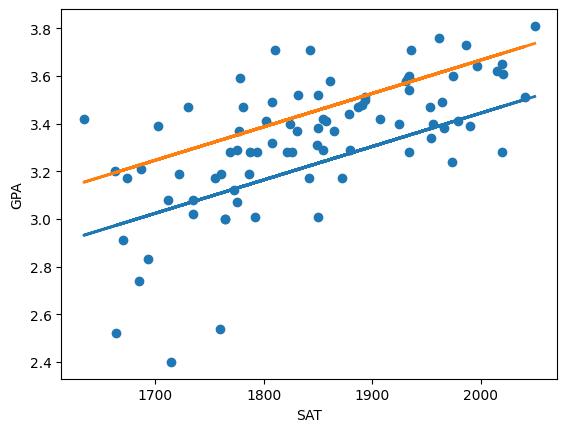

In [46]:
plt.scatter(df['SAT'], y)
si=0.8665+0.0014*df['SAT']
no=0.6439+0.0014*df['SAT']
plt.plot(df['SAT'],no, lw=2)
plt.plot(df['SAT'],si, lw=2)
plt.ylabel('GPA')
plt.xlabel('SAT')
plt.show()

Aquí se puede apreciar mejor los resultados de predicción y encontramos que el promedio de GPA de las personas que si asisitieron a más del 75% de las clases es más alto por 0.2226

Bien, Ahora procederemos hacer algunas predicciones...

In [47]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


Se hará la prueba con Andres quien tiene una calificación de 1700 y no asisitio a más del 75% de las clases y Maria quien saco 1670 y si asistio a más del 75% de las clases

In [48]:
entradas=pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
entradas=entradas[['const','SAT','Attendance']]
entradas

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [49]:
entradas.rename(index={0:'Andres',1:'Maria'})

,const,SAT,Attendance
Andres,1,1700,0
Maria,1,1670,1


In [50]:
prediccion=regresion.predict(entradas)
prediccion

0    3.023513
1    3.204163
dtype: float64

In [52]:
tabla=pd.DataFrame({'Prediccion':prediccion})
union=entradas.join(tabla)
union.rename(index={0:'Andres',1:'Maria'})


,const,SAT,Attendance,Prediccion
Andres,1,1700,0,3.023513
Maria,1,1670,1,3.204163


Con esta tabla podemos visualizar mejor los datos de la predicción. Vemos que aunque Andres tuvo mayor calificación en el SAT, él no entro al menos al 75% de las clases, por lo tanto se predice que su GAP sería menor al de Maria, quien a pesar de tener menor calificación en el SAT, la predicción es mayor que la de Andres